<h1>Содержание<span class="tocSkip"></span></h1>
</span></li></ul></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Общие-выводы" data-toc-modified-id="Общие-выводы-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общие выводы</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Необходимо спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Нам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Построим модель с предельно большим значением *F1*-меры. Для успешной сдачи проекта нужно довести метрику до 0.59. Необходимо проверить *F1*-меру на тестовой выборке.

Дополнительно измерим *AUC-ROC*, сравнивая её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

**Признаки**
- `RowNumber` — индекс строки в данных
- `CustomerId` — уникальный идентификатор клиента
- `Surname` — фамилия
- `CreditScore` — кредитный рейтинг
- `Geography` — страна проживания
- `Gender` — пол
- `Age` — возраст
- `Tenure` — сколько лет человек является клиентом банка
- `Balance` — баланс на счёте
- `NumOfProducts` — количество продуктов банка, используемых клиентом
- `HasCrCard` — наличие кредитной карты
- `IsActiveMember` — активность клиента
- `EstimatedSalary` — предполагаемая зарплата

**Целевой признак**
- `Exited` — факт ухода клиента

## Подготовка данных

Импортируем и изучим данные. Так как они взяты с kaggle.com, они, видимо, частично подготовлены.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.utils import shuffle

In [2]:
data = pd.read_csv('/Users/sirotadmitry/github_projects/first-project/Churn.csv')
display(data.sample(10))

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9981,9982,15672754,Burbidge,498,Germany,Male,42,3.0,152039.70,1,1,1,53445.17,1
7656,7657,15575146,Jamieson,492,Germany,Male,51,8.0,117808.74,2,1,1,67311.12,0
1013,1014,15603594,Nwankwo,635,Spain,Male,24,4.0,0.00,2,1,1,70668.77,0
3120,3121,15694879,Reeves,590,Spain,Female,23,7.0,0.00,2,1,0,196789.90,0
568,569,15795564,Moretti,737,Germany,Male,31,5.0,121192.22,2,1,1,74890.58,0
4894,4895,15636872,Amadi,585,France,Female,32,8.0,144705.87,2,0,0,171482.56,0
7226,7227,15614813,Cocci,777,Germany,Female,46,0.0,107362.80,1,1,0,487.30,0
4060,4061,15593250,Hsiao,640,France,Female,29,4.0,0.00,2,1,0,44904.26,0
8656,8657,15791342,Johnston,660,Spain,Male,31,1.0,84560.04,1,1,1,137784.25,0
5313,5314,15794939,Chiu,783,France,Female,72,5.0,121215.90,2,1,1,105206.48,0


In [3]:
display(data.describe())

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Выбросов в данных не наблюдается.

In [4]:
display(data.shape)

(10000, 14)

В датафрейме 10000 строк и 14 столбцов. В наличии категориальные столбцы: `Surname`, `Geography`, `Gender`. В некоторых фамилиях нераспознанные символы, заменены на символ "?". В столбце `Balance` есть отсутствующие данные.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


В столбце `Tenure` есть отсутствующие данные (909 шт.)

Удалим пропущенные значения в датафрейме.

In [6]:
data = data.dropna()

Посмотрим оригинальные данные в столбцах `Surname`, `Gender` и `Geofraphy`. В столбцах `Gender` и `Geofraphy` посчитаем количество оригинальных значений.

In [7]:
data['Surname'].unique()

array(['Hargrave', 'Hill', 'Onio', ..., 'Kashiwagi', 'Aldridge',
       'Burbidge'], dtype=object)

Очевидно, что столбец `Surname` с уникальными фамилиями соотносится сто столбцом `CustomerId`. По этой причине столбец `Surname` предобрабатывать не будем. Удалим столбец `Surname`, так как он не участвует в дальнейшем анализе.

In [8]:
data = data.drop(['Surname'], axis=1)

In [9]:
data['Geography'].value_counts()

France     4550
Germany    2293
Spain      2248
Name: Geography, dtype: int64

In [10]:
data['Gender'].value_counts()

Male      4974
Female    4117
Name: Gender, dtype: int64

Проведем обработку категориальных признаков в столбцах `Gender` и `Geofraphy` техникой One-Hot-Encoding. Кроме того, промасштабируем данные. Совместим кодирование категориальных и масштабирование численных признаков.

Разобъем данные на три выборки: обучающую(60%), валидационную (20%) и тестовую (20%). Напечатаем размеры получившихся наборов.

In [11]:
data_ohe = pd.get_dummies(data, drop_first=True) # OHE
# Разбиение данных на три выборки: обучающую(60%), валидационную (20%) и тестовую (20%)
data_train, data_valid, data_test = np.split(data_ohe.sample(frac=1), [int(.6*len(data)), int(.8*len(data))])
# Напечатаем размеры получившихся наборов
display(data_train.shape)
display(data_valid.shape)
display(data_test.shape)

numeric = ['CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
           'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
target_train = data_train['Exited']
features_train = data_train.drop('Exited', axis=1)
target_valid = data_valid['Exited']
features_valid = data_valid.drop('Exited', axis=1)

scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
# Напечатаем размер features_train для проверки
display(features_train.shape) 

(5454, 14)

(1818, 14)

(1819, 14)

(5454, 13)

**Вывод**

Удалили столбец `Surname`. Удалили строки с пропущенными значениями.

Провели обработку категориальных признаков в столбцах `Gender` и `Geofraphy` техникой One-Hot-Encoding.

Разбили данные на три выборки: обучающую (60%), валидационную (20%) и тестовую (20%).

## Исследование задачи

Обучим модель решающего дерева и проверим accuracy.

In [12]:
model = DecisionTreeClassifier(random_state=12345)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid) 

accuracy_valid = accuracy_score(target_valid, predicted_valid)
print(accuracy_valid)

0.7656765676567657


Оценим адекватность модели, проверяя, как часто в целевом признаке встречается класс «1» или «0». Построим барплот.

0    0.796062
1    0.203938
Name: Exited, dtype: float64


<AxesSubplot:>

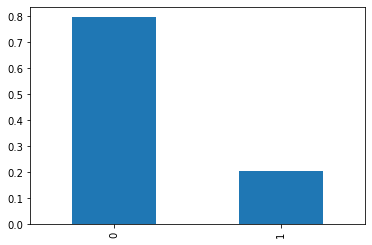

In [13]:
class_frequency_1_0 = data['Exited'].value_counts(normalize=0.5)
print(class_frequency_1_0)
class_frequency_1_0.plot(kind='bar')

Проанализируем частоты классов в результатах предсказаний решающего дерева и построим по результатам барплот.

0    0.754125
1    0.245875
dtype: float64


<AxesSubplot:>

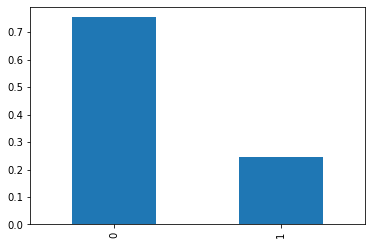

In [14]:
predicted_valid = pd.Series(model.predict(features_valid))

class_frequency_pred = predicted_valid.value_counts(normalize=0.5)
print(class_frequency_pred)
class_frequency_pred.plot(kind='bar')

Разницы в частотах классов практически нет.

Создадим константную модель: любому объекту она прогнозирует класс "0", сравним ее accuracy со значением нашей модели.

In [15]:
target_pred_constant = pd.Series(0, index=target_valid.index)
print(accuracy_score(target_valid, target_pred_constant))

0.7772277227722773


Проверку на адекватность модель не прошла. Accuracy решающего дерева и константной модели почти одинаковы. В нашей задаче наблюдается сильный дисбаланс классов, что плохо сказывается на обучении модели.

Определим значение F1-меры.

In [16]:
print(f1_score(target_valid, predicted_valid))

0.5


Значение F1-меры для решающего дерева равно 0.48. Прогноз класса "1" удался плохо.

Рассмотрим алгоритм классификации "Случайный лес" с гиперпараметром n_estimators от 1 до 20, max_depth от 1 до 20, min_samples_split и min_samples_leaf от 1 до 2.

In [17]:
best_estimators = None
best_max_depth_1 = None
best_min_samples_split_1 = 1
best_min_samples_leaf_1 = None
best_result_1 = 0

for est in range(1, 21):
    for depth in range (1,21):
        for samples_split in range(2,3):
            for samples_leaf in range(2,3):
                model_rf_1 = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth, min_samples_split = samples_split, min_samples_leaf = samples_leaf) # обучение модели
                model_rf_1.fit(features_train, target_train) # обучение модели на тренировочной выборке
                predicted_valid_rf_1 = model_rf_1.predict(features_valid) # предсказание
                result_1 = accuracy_score(target_valid, predicted_valid_rf_1) # качество модели на валидационной выборке
                if result_1 > best_result_1:
                    best_estimators = est
                    best_max_depth_1 = depth
                    best_min_samples_split_1 = samples_split
                    best_min_samples_leaf_1 = samples_leaf
                    
                    best_result_1 = result_1 #  сохранение наилучшего значения метрики accuracy на валидационных данных

print("Accuracy наилучшей модели при n_estimators = ", best_estimators, ", max_depth = ", best_max_depth_1, ", min_samples_split=", best_min_samples_split_1, ", min_samples_leaf =",  best_min_samples_leaf_1, "на валидационной выборке:", best_result_1)



Accuracy наилучшей модели при n_estimators =  18 , max_depth =  18 , min_samples_split= 2 , min_samples_leaf = 2 на валидационной выборке: 0.8415841584158416


In [18]:
print(f1_score(target_valid, predicted_valid_rf_1))

0.510108864696734


Значение F1-меры для модели случайного леса равно 0.57.

**Вывод**

Accuracy решающего дерева и константной модели почти одинаковы. Проверку на адекватность модель не прошла. В нашей задаче наблюдается сильный дисбаланс классов, что плохо сказывается на обучении модели.

Значение F1-меры для решающего дерева равно 0.49. Прогноз класса "1" удался плохо.

Значение F1-меры для наилучшей модели случайного леса при n_estimators =  16 , max_depth =  09,  min_samples_split= 2 , min_samples_leaf = 2 равно 0.58.

## Борьба с дисбалансом

Сбалансируем модель решающего дерева. Сделаем веса классов сбалансированными.

In [19]:
model_2 = DecisionTreeClassifier(random_state=12345, class_weight='balanced')
model_2.fit(features_train, target_train)
predicted_valid = model_2.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.4875


F1-мера решающего дерева при балансировке увеличилась до 0.49.

Применим технику upsampling (увеличение выборки) на обучающей выборке.

In [20]:
def upsample(features_train, target_train, repeat):
    features_zeros = features_train[target_train == 0]
    features_ones = features_train[target_train == 1]
    target_zeros = target_train[target_train == 0]
    target_ones = target_train[target_train == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 10)

model_3 = DecisionTreeClassifier(random_state=12345)
model_3.fit(features_upsampled, target_upsampled)
predicted_valid = model_3.predict(features_valid)


print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.4836272040302267


Метрика F1 решающего дерава при увеличении выборки уменьшилась до 0.48. Попробуем технику downsampling (уменьшение выборки).

In [21]:
def downsample(features_train, target_train, fraction):
    features_zeros = features_train[target_train == 0]
    features_ones = features_train[target_train == 1]
    target_zeros = target_train[target_train == 0]
    target_ones = target_train[target_train == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.1)

model_4 = DecisionTreeClassifier(random_state=12345)
model_4.fit(features_downsampled, target_downsampled)
predicted_valid = model_4.predict(features_valid)

print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.4529085872576178


Метрика F1 решающего дерава при уменьшении выборки уменьшилась до 0.46.

Сбалансируем модель случайного леса. Сделаем веса классов сбалансированными.

In [22]:
model_rf_2 = RandomForestClassifier(random_state=12345, n_estimators=16, max_depth=9, min_samples_split= 2, min_samples_leaf = 2, class_weight='balanced')
model_rf_2.fit(features_train, target_train)
predicted_valid_rf_2 = model_rf_2.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid_rf_2))

F1: 0.5902031063321386


F1-метрика для случайного леса при балансировке классов увеличилась до 0.60.

Применим технику upsampling (увеличение выборки) для модели случайного леса на обучающей выборке.

In [23]:
best_repeat = 0
best_f1_score = 0
best_model_rf_3 = None

for rep in range(1, 10):
    features_upsampled, target_upsampled = upsample(features_train, target_train, repeat=rep)
    model_rf_3 = RandomForestClassifier(random_state=12345, n_estimators=16, max_depth=9, min_samples_split= 2 , min_samples_leaf = 2)
    model_rf_3_up = model_rf_3.fit(features_upsampled, target_upsampled)
    predicted_valid_rf_3 = model_rf_3_up.predict(features_valid)
    f1_score_rf_3 = f1_score(target_valid, predicted_valid_rf_3)
    if f1_score_rf_3 > best_f1_score:
        best_repeat = rep
        best_f1_score = f1_score_rf_3
        best_model_rf_3 = model_rf_3_up

print("F1:", best_f1_score, 'при repeat = ', best_repeat)

F1: 0.5984251968503937 при repeat =  4


F1-метрика для случайного леса при увеличении выборки показала наилучшее значение 0.62 при значении repeat = 3.

In [24]:
best_fraction = 0
best_f1_score_down = 0
best_model_rf_4= None

for fraction in np.arange(0, 1, 0.1):
    features_downsampled, target_downsampled = downsample(features_train, target_train, fraction=fraction)
    model_rf_4 = RandomForestClassifier(random_state=12345, n_estimators=16, max_depth=9, min_samples_split= 2 , min_samples_leaf = 2)
    model_rf_4_down = model_rf_4.fit(features_downsampled, target_downsampled)
    predicted_valid_rf_4 = model_rf_4.predict(features_valid)
    f1_score_rf_4 = f1_score(target_valid, predicted_valid_rf_3)
    if f1_score_rf_4 > best_f1_score_down:
        best_fraction = fraction
        best_f1_score_down = f1_score_rf_4
        best_model_rf_4 = model_rf_4_down

print("F1:", best_f1_score_down, 'при fraction = ', best_fraction)

F1: 0.5497076023391813 при fraction =  0.0


F1-метрика для случайного леса при уменьшении выборки показала наилучшее значение 0.53 при значении fraction = 0.

Изменим значение порога для случайного леса и посмотрим, какой станет метрика F1.

In [25]:
best_estimators_5 = None
best_max_depth_5 = None
best_f1_score_rf_5 = 0
best_threshold = 0


for threshold in np.arange(0, 0.3, 0.02):
    for est in range(1, 10):
        for depth in range (1, 10):
            model_rf_5 = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
            model_rf_5.fit(features_train, target_train)
            probabilities_valid = model.predict_proba(features_valid)
            probabilities_one_valid = probabilities_valid[:, 1]
            predicted_valid_rf_5 = probabilities_one_valid > threshold
            f1_score_rf_5 = f1_score(target_valid, predicted_valid_rf_5)
            if f1_score_rf_5 > best_f1_score_rf_5:
                best_estimators_5 = est
                best_max_depth_5 = depth
                best_f1_score_rf_5 = f1_score_rf_5
                best_treshold = threshold
                
print("F1 наилучшей модели при n_estimators = ", best_estimators_5, ", max_depth = ", best_max_depth_5, "при пороге = ", best_threshold, "на валидационной выборке:", best_f1_score_rf_5) 



F1 наилучшей модели при n_estimators =  1 , max_depth =  1 при пороге =  0 на валидационной выборке: 0.5


Изменение порога не приводит к изменению метрики F1.

**Вывод**

Проведена борьба с дисбалансом модели решающего дерева. Проведена балансировка (F1 = 0.48), увеличение выборки (F1 = 0.48), уменьшение выборки (F1 = 0.46). 

Проведена борьба с дисбалансом модели случайного леса. Проведена балансировка (F1 = 0.60), увеличение выборки (F1 = 0.62, повтор = 3), уменьшение выборки (F1 = 0.53). Проведена попытка изменения порога. Величина порога не влияет на F1.

## Тестирование модели

Протестируем модель, предварительно прошкалировав данные и увеличив выборку в два раза (repeat = 3).

In [26]:
features_test = data_test.drop('Exited', axis=1)
target_test = data_test['Exited']

scaler = StandardScaler()
scaler.fit(features_test[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

predictions_test = best_model_rf_3.predict(features_test)
print("F1:", f1_score(target_test, predictions_test))

F1: 0.6002372479240806


Для выбранной модели случайного леса метрика F1 при тестировании составила 0.61.

Изучим значения метрики AUC-ROC.

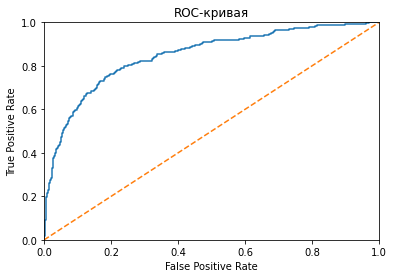

In [27]:
probabilities_valid_test = best_model_rf_3.predict_proba(features_test)
probabilities_one_valid_test = probabilities_valid_test[:, 1]

fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_valid_test)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

In [28]:
auc_roc = roc_auc_score(target_test, probabilities_one_valid_test)

display(auc_roc)

0.848160796733697

Значение AUC-ROC = 0.84 и близко к единице. Значение AUC-ROC случайной модели равно 0.5. Наша модель сильно отличается от случайной.

**Вывод**

Для выбранной модели случайного леса метрика F1 при тестировании составила 0.61.

Значение AUC-ROC = 0.84 и близко к единице. Значение AUC-ROC случайной модели равно 0.5. Наша модель сильно отличается от случайной.

## Общие выводы

Удалили столбец `Surname`. Удалили строки с пропущенными значениями.

Провели обработку категориальных признаков в столбцах `Gender` и `Geofraphy` техникой One-Hot-Encoding.

Разбили данные на три выборки: обучающую (60%), валидационную (20%) и тестовую (20%).

Accuracy решающего дерева и константной модели почти одинаковы. Проверку на адекватность модель не прошла. В нашей задаче наблюдается сильный дисбаланс классов, что плохо сказывается на обучении модели.

Значение F1-меры для решающего дерева равно 0.49. Прогноз класса "1" удался плохо.

Значение F1-меры для наилучшей модели случайного леса при n_estimators =  18 , max_depth =  12 равно 0.57.

Проведена борьба с дисбалансом модели решающего дерева. Проведена балансировка (F1 = 0.48), увеличение выборки (F1 = 0.48), уменьшение выборки (F1 = 0.46).

Проведена борьба с дисбалансом модели случайного леса. Проведена балансировка (F1 = 0.60), увеличение выборки (F1 = 0.62, повтор = 3), уменьшение выборки (F1 = 0.53). Проведена попытка изменения порога. Величина порога не влияет на F1.

Для выбранной модели случайного леса метрика F1 при тестировании составила 0.61.

Значение AUC-ROC = 0.84 и близко к единице. Значение AUC-ROC случайной модели равно 0.5. Наша модель сильно отличается от случайной.

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 3: учтён дисбаланс
    - [x]  Применено несколько способов борьбы с дисбалансом
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 4: проведено тестирование
- [x]  Удалось достичь *F1*-меры не менее 0.59
- [x]  Исследована метрика *AUC-ROC*